<a href="https://colab.research.google.com/github/PunamDahal/TSF-Internship-Tasks/blob/main/Task2_Prediction_Using_Unsupervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP @THE SPARKS FOUNDATION**

#**Data Science & Business Analytics Internship**

**BATCH: OCTOBER 2023**

**Name: Punam Dahal**

## **Task2: Prediction Using Unsupervised ML**

From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.




**Importing Librarires**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [3]:
# Load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [12]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
iris_df.isnull().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

#**K-Means Clustering**

We use K-means clustering to separate the data into distinct clusters or groups such that data with similarity are in one cluster than data with slight difference in another.

**Finding the optimum number of clusters i.e value of k  for K Means clustering**

In [6]:
# List to store the WCSS values
wcss = []
# Try different values of K from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(iris_df)  # Fit the K-means model to your data
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS


**Elbow Method**: It is one of the method to find the optimum number of clusters which provides visual to find the value of k based on WCSS (within-clustersum of squares) values.

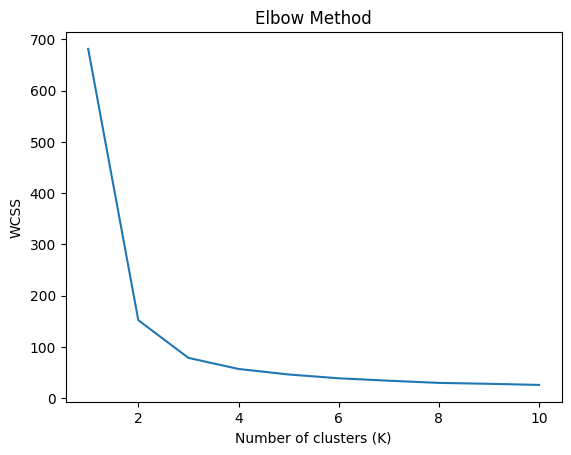

In [7]:
# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

The "elbow point" is the K value at which the rate of decrease in WCSS starts to slow down which is 3 as per the plot.

In [8]:
#from above elbow method
k=3

In [9]:
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0) #providing specific details for better convergence
x = kmeans.fit_predict(iris_df)
print(x)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [10]:
centroids = kmeans.cluster_centers_  #getting cluster center


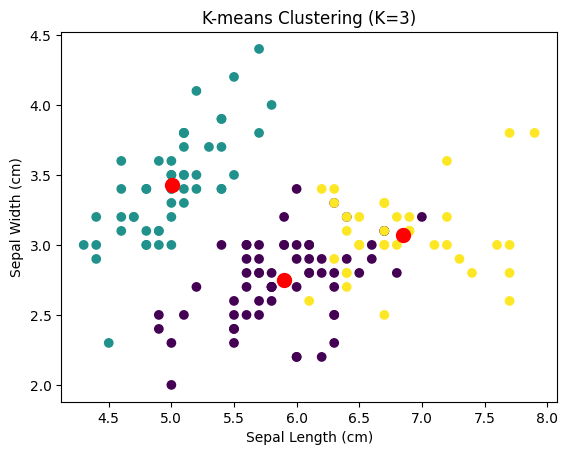

In [11]:
#Visualize the clusters only for first two features
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'], c=x, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', s=100, label='Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('K-means Clustering (K=3)')
plt.show()

This concludes K-means clustering of Iris dataset.